<a href="https://colab.research.google.com/github/Axel3D2Y/MACHINE-LEARNING-MODELS-USING-SCIKIT-LEARN/blob/main/Videojuegos%20analisis%20de%20datos%20exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estás trabajando como analista de datos para una tienda de videojuegos en línea. Se te proporciona un conjunto de datos con información sobre las ventas de videojuegos a lo largo de varios años. Tu objetivo es realizar un análisis de ventas y descubrir patrones que puedan ayudar a mejorar las decisiones de marketing y aumentar las ventas.


Descripción del dataset:

* Name: Nombre del videojuego.
* Platform: Plataforma de la consola (por ejemplo, PS4, Xbox One, etc.).
* Year: Año de lanzamiento del juego.
* Genre: Género del juego (por ejemplo, acción, deportes, etc.).
* Publisher: Empresa que publicó el juego.
* NA_Sales: Ventas en Norteamérica (en millones de unidades).
* EU_Sales: Ventas en Europa (en millones de unidades).
* JP_Sales: Ventas en Japón (en millones de unidades).
* Other_Sales: Ventas en el resto del mundo (en millones de unidades).
* Global_Sales: Ventas globales (en millones de unidades).




Tareas:

Análisis de ventas globales:



1.   
Identifica los videojuegos más vendidos globalmente.
Calcula las ventas totales por género de videojuego.
Analiza las plataformas con mayores ventas globales.

Análisis regional:
2.   Compara las ventas entre Norteamérica, Europa y Japón.
Identifica si hay algún género de videojuegos que sea especialmente popular en una región específica.

Estacionalidad y tendencias:
3. Identifica los años con mayores ventas de videojuegos.
Analiza si hay alguna tendencia creciente o decreciente en las ventas a lo largo de los años.

Relación entre plataformas y géneros:

3. ¿Existen plataformas específicas donde se vendan más videojuegos de ciertos géneros (por ejemplo, juegos de deportes en PlayStation)?
¿Qué plataformas han tenido un crecimiento o caída en popularidad a lo largo de los años?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import sheets
data=pd.read_csv('/content/vgsales.csv')
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/10BAhXatbucfSCUdB0Hmb55TDq3Pfy2wsPgLufCzYCU4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


# **Análisis global:**

<Axes: xlabel='Name', ylabel='Global_Sales'>

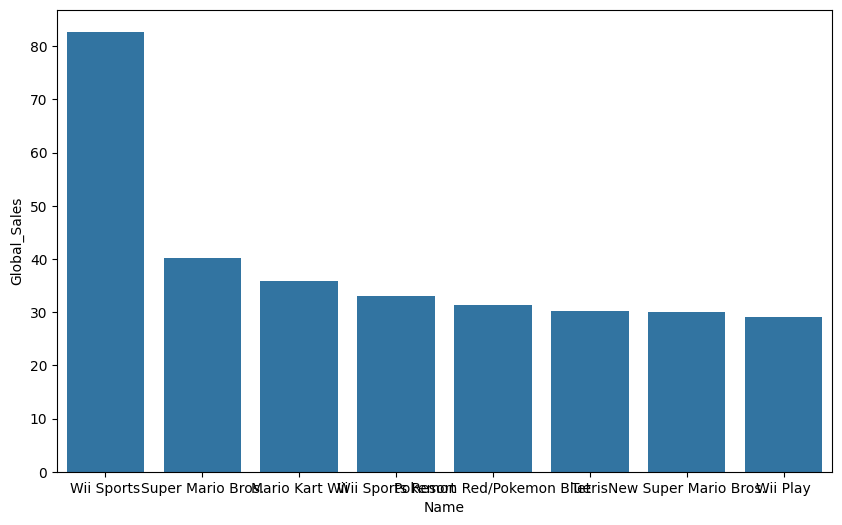

In [ ]:
data_global_sales=data[['Name','Publisher','Global_Sales']].sort_values(by='Global_Sales',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Name',y='Global_Sales',data=data_global_sales.head(8))

In [ ]:
data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


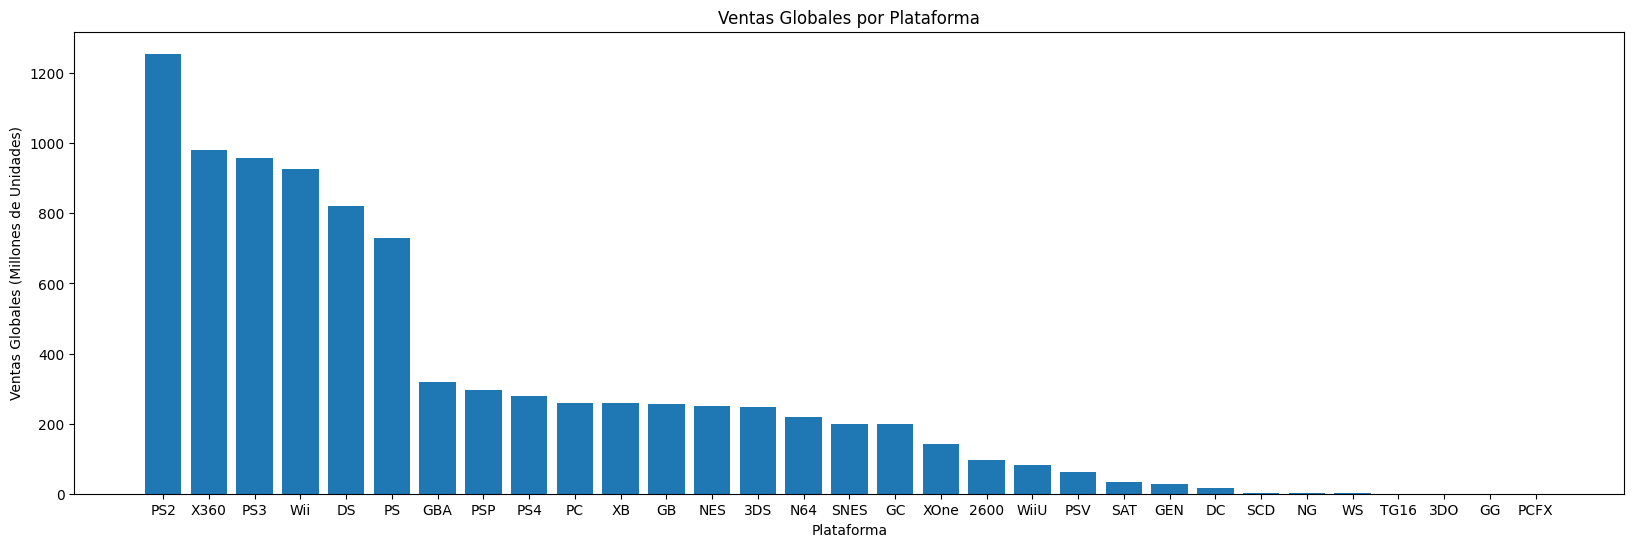

In [ ]:
data_plarform=data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,6))
plt.bar(data_plarform.index,data_plarform.values)
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (Millones de Unidades)')
plt.show()

# **Análisis regional**

In [ ]:
#COMPARA LAS VENTAS
Ventas=data[[ 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()


In [ ]:
Ventas

,0
NA_Sales,4392.95
EU_Sales,2434.13
JP_Sales,1291.02
Other_Sales,797.75


In [ ]:
print(f'Las ventas de NA comparadas con EU son de {Ventas[0]-Ventas[1]}' )
print(f'Las ventas de NA comparadas con JP son de {Ventas[0]-Ventas[2]}')
print(f'Las ventas de NA comparadas con otros son de {Ventas[0]-Ventas[3]}')
#Analogamente para las demas partes,

Las ventas de NA comparadas con EU son de 1958.820000000001
Las ventas de NA comparadas con JP son de 3101.9300000000003
Las ventas de NA comparadas con otros son de 3595.2000000000007


<ipython-input-14-e7452bda660c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Las ventas de NA comparadas con EU son de {Ventas[0]-Ventas[1]}' )
<ipython-input-14-e7452bda660c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Las ventas de NA comparadas con JP son de {Ventas[0]-Ventas[2]}')
<ipython-input-14-e7452bda660c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Las ventas de NA comparadas con otro

In [ ]:
# identifica si hay algún género de videojuegos que sea especialmente popular en una región específica.
games_popu=data.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum().head()

In [ ]:
games_popu['NA_Sales'].sort_values(ascending=False)
games_popu['EU_Sales'].sort_values(ascending=False)
games_popu['JP_Sales'].sort_values(ascending=False)


,JP_Sales
Genre,
Action,159.95
Platform,130.77
Misc,107.76
Fighting,87.35
Adventure,52.07


In [ ]:
print(f'El genero mas popular en NA es {games_popu["NA_Sales"].sort_values(ascending=False).head(1).index[0]}, en EU es:{games_popu["EU_Sales"].sort_values(ascending=False).head(1).index[0]} y en JP es {games_popu["JP_Sales"].sort_values(ascending=False).head(1).index[0]}')

El genero mas popular en NA es Action, en EU es:Action y en JP es Action


# **`Estacionalidad y tendencias:`**

In [ ]:
sales_by_year = data.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)
sales_by_year.head(5)

,Global_Sales
Year,
2008.0,678.90
2009.0,667.30
2007.0,611.13
2010.0,600.45
2006.0,521.04


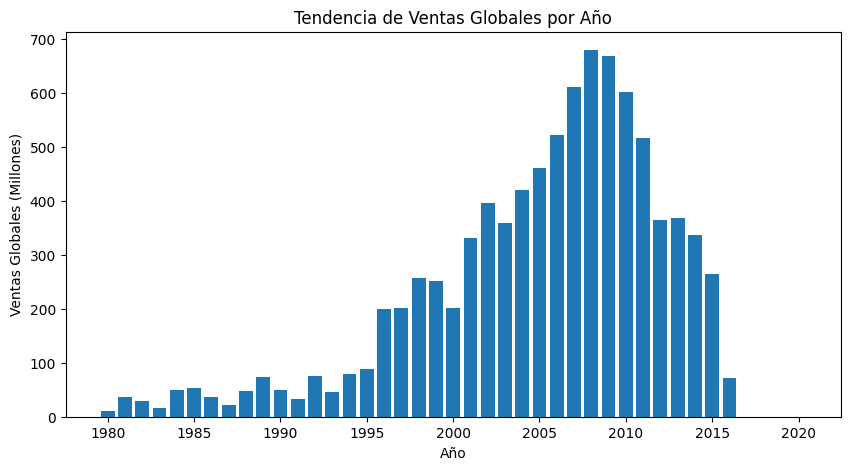

In [ ]:
#Identifica los años con mayores ventas de videojuegos.
# Analiza si hay alguna tendencia creciente o decreciente en las ventas a lo largo de los años.

sales_by_year = data.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)

# Graficar la tendencia de ventas por plataforma a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.bar(sales_by_year.index,sales_by_year.values)
plt.title('Tendencia de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (Millones)')
plt.show()


# **`Relación entre plataformas y géneros:`**



In [ ]:
#¿Existen plataformas específicas donde se vendan más videojuegos de ciertos géneros (por ejemplo, juegos de deportes en PlayStation)?


In [ ]:
data.groupby('Platform')['Genre'].value_counts(ascending=False).sort_values(ascending=False)

,,count
Platform,Genre,
PS2,Sports,400
DS,Misc,393
PS3,Action,380
PS2,Action,348
DS,Action,343
...,...,...
DC,Simulation,1
TG16,Shooter,1
GG,Platform,1


In [ ]:
# ¿Qué plataformas han tenido un crecimiento o caída en popularidad a lo largo de los años?
sales_by_year_platform = data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

In [ ]:
sales_by_year_platform

,Year,Platform,Global_Sales
0,1980.0,2600,11.38
1,1981.0,2600,35.77
2,1982.0,2600,28.86
3,1983.0,2600,5.83
4,1983.0,NES,10.96
...,...,...,...
236,2016.0,X360,0.83
237,2016.0,XOne,12.37
238,2017.0,PS4,0.03
239,2017.0,PSV,0.02


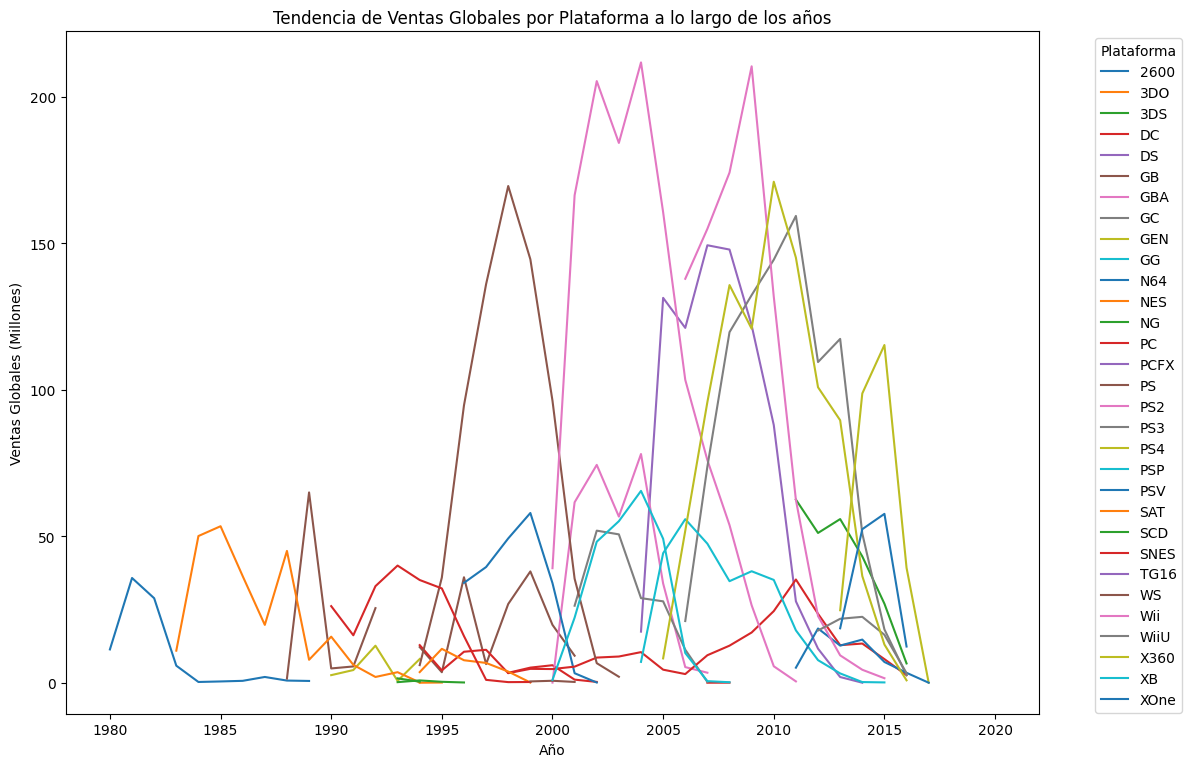

In [ ]:
pivot_table = sales_by_year_platform.pivot(index='Year', columns='Platform', values='Global_Sales')

# Graficar la tendencia de ventas por plataforma a lo largo del tiempo
plt.figure(figsize=(12, 8))
pivot_table.plot(ax=plt.gca(), title='Tendencia de Ventas Globales por Plataforma a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (Millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()